In [5]:
import tensorflow as tf
import cv2
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def load_model():
    print("Loading the model...")
    global model
    model = tf.keras.models.load_model("models/handwash_model_v1.1.keras")
    # model = tf.keras.models.load_model("models/downloaded_model.keras")
    print("model loaded successfully!")

load_model()

Loading the model...


2024-12-01 13:54:57.354551: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134217728 exceeds 10% of free system memory.
2024-12-01 13:54:57.517693: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134217728 exceeds 10% of free system memory.
2024-12-01 13:54:57.552398: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134217728 exceeds 10% of free system memory.
2024-12-01 13:54:57.742378: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134217728 exceeds 10% of free system memory.
2024-12-01 13:54:57.772640: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134217728 exceeds 10% of free system memory.


model loaded successfully!


In [3]:
camera_frames_path = "dataset/camera"

Interlock fingers and rub the back of fingers of both hands


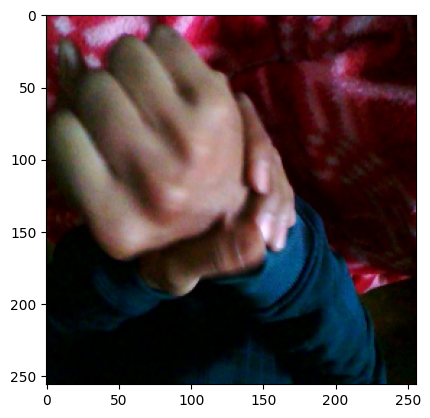

In [17]:
labels_dict = {0: "Rub both wrists in rotating manner",
            1: "Rub your palms together",
            2: "Rub the back of your fingers and hands",
            3: "Rub your hands by interlocking your fingers",
            4: "Interlock fingers and rub the back of fingers of both hands",
            5: "Rub the area between index finger and thumb",
            6: "Rub fingertips on palm of both hands in circular manner"}
for filename in os.listdir(camera_frames_path):
    frame_path = f"{camera_frames_path}/{filename}"
    img = cv2.imread(frame_path)[..., ::-1]
    img = cv2.resize(img, (256, 256))
    img = cv2.rotate(img, cv2.ROTATE_180)
    img = img/255.
    probas = model.predict(np.expand_dims(img, axis=0), verbose=0)
    label = probas.argmax()
    print(labels_dict[label])
    plt.imshow(img)
    break